# Data Analysis
---
At this Jupiter Notebook you can find some analysis of primary dataset for working with classificaton/tagging task. <br>
Within this notebook you able to understand train of thought about processing source data and choosing models. 

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

In [2]:
module_path = os.path.abspath(os.path.join('..')) # Path to root folder
if module_path not in sys.path:
    sys.path.append(module_path + "/scripts") # define scripts path

from ipynb_func import *

Data loader:

In [3]:
NUM = 10 # Number of data parquets to use

assert NUM >= 1 and NUM <= 10, "NUM value must be in range [1, 9]"
paths = [module_path + f"/data/pikabu/000{i}.parquet" for i in range(NUM)] # Making list of roots to merge 

data = merge_dataset(paths)

In [4]:
data.head(2)

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags,blocks,comments
0,6991642,Что можно купить в Китае за цену нового iPhone...,Осенью в России стартовали продажи очередной м...,1571221527,2900955,chinatoday.ru,-4,9,13,https://pikabu.ru/story/chto_mozhno_kupit_v_ki...,"[Китай, AliExpress, Китайские товары, Бизнес, ...",{'data': ['<p>Осенью в России стартовали прода...,"{'id': [152116588, 152116426, 152114895, 15211..."
1,7178566,Последний оставшийся в живых освободитель Осве...,В канун 75-летия освобождения концлагеря и V В...,1579586602,1723707,sssr24,1339,1498,159,https://pikabu.ru/story/posledniy_ostavshiysya...,"[Великая Отечественная война, Чтобы помнили, О...",{'data': ['<p>В канун 75-летия освобождения ко...,"{'id': [159479910, 159460617, 159469842, 15947..."


In [5]:
print("Total length of dataset =", len(data))

Total length of dataset = 279000


In [6]:
""" 
It is suggested to look at the dataset, starting with the most recent posts. 
If necessary, the oldest posts can be easily ignored.
"""

data.sort_values(by=['timestamp'], inplace=True, ascending=False)
data.reset_index(inplace=True)
data.drop(['index'], axis='columns', inplace=True)
data.head(2)

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags,blocks,comments
0,7459063,От патрона до…,,1589869418,2569119,KiteRunner,0,0,0,https://pikabu.ru/story/ot_patrona_do_7459063,"[Магазин, Комментарии, Универсальный, Скриншот]",{'data': ['https://cs11.pikabu.ru/post_img/big...,"{'id': [], 'timestamp': [], 'parent_id': [], '..."
1,7459038,А вы знаете этих великих сыщиков?,,1589868662,3093826,Olgapaniseva,0,0,0,https://pikabu.ru/story/a_vyi_znaete_yetikh_ve...,"[Книги, Киногерои, Длиннопост]",{'data': ['https://cs13.pikabu.ru/post_img/big...,"{'id': [], 'timestamp': [], 'parent_id': [], '..."


In [7]:
last_post_time = datetime.fromtimestamp(data.timestamp[0])
first_post_time = datetime.fromtimestamp(data.timestamp[len(data)-1])

print("Time of the latest post in dataset:",  last_post_time)
print("Time of the oldest post in dataset:", first_post_time)

Time of the latest post in dataset: 2020-05-19 09:23:38
Time of the oldest post in dataset: 2011-12-28 15:46:13


In [8]:
""" 
The following assumption is made:
    The greatest interest in this dataset is the collection of the following columns:
    - Post title and post content
    - Tags corresponding to the post
    - Link to post for correct debugging and comparison
 """

data = data[['title', 'text_markdown', 'url','tags']]
data.head(4)

,title,text_markdown,url,tags
0,От патрона до…,,https://pikabu.ru/story/ot_patrona_do_7459063,"[Магазин, Комментарии, Универсальный, Скриншот]"
1,А вы знаете этих великих сыщиков?,,https://pikabu.ru/story/a_vyi_znaete_yetikh_ve...,"[Книги, Киногерои, Длиннопост]"
2,Ахтунг !! Видео вызывает смешанные чувства,,https://pikabu.ru/story/akhtung__video_vyizyiv...,"[Тюмень, Трюкачи, Авто, Видео]"
3,Коротко о ситуации в стране,Украдено с YouTube.,https://pikabu.ru/story/korotko_o_situatsii_v_...,"[Коронавирус, Полиция, Пацаки, Видео]"


In [9]:
APPEAR_AT_LEAST = 50

tg = getwordlist(data.tags)
tg_cnt = getworddict(tg, at_least=1)

assert APPEAR_AT_LEAST >= 1 and APPEAR_AT_LEAST <= max(tg_cnt.values()), f"Value must be in range [1, {max(tg_cnt.values())}]."

tg_cnt_cond = getworddict(tg, at_least=APPEAR_AT_LEAST)

print("Total number of tags in full dataset:", len(tg_cnt))
print(f"Number of tags in full dataset that appear more than {APPEAR_AT_LEAST} times: {len(tg_cnt_cond)}")
tg_cnt_cond

Total number of tags in full dataset: 81675
Number of tags in full dataset that appear more than 50 times: 2734


{'Текст': 56778,
 'Длиннопост': 53276,
 'Видео': 35336,
 'Юмор': 14498,
 'Кот': 12473,
 'Коронавирус': 9746,
 'Фотография': 9095,
 'Политика': 6144,
 'Мат': 6036,
 'Гифка': 5804,
 'Россия': 5779,
 'Скриншот': 5661,
 'Пикабу': 5451,
 'Интересное': 4900,
 'Помощь': 4892,
 'Арт': 4875,
 'Комиксы': 4786,
 'История': 4686,
 'Другое': 4646,
 'Собака': 4605,
 'Девушки': 4354,
 'Украина': 4039,
 'Дети': 3998,
 'Игры': 3743,
 'Новости': 3691,
 'Аниме': 3466,
 'Комментарии': 3454,
 'Рисунок': 3419,
 'Работа': 3345,
 'Без рейтинга': 3339,
 'Животные': 3274,
 'Картинка с текстом': 3163,
 'Карантин': 3141,
 'Комментарии на Пикабу': 3119,
 'Картинки': 3060,
 'Картинки и фото': 3033,
 'Anime Art': 2711,
 'ВКонтакте': 2611,
 'Фильмы': 2605,
 'Общество': 2582,
 'Авто': 2557,
 'Музыка': 2525,
 'Котомафия': 2510,
 'Мемы': 2363,
 'Негатив': 2358,
 'Москва': 2299,
 'Стихи': 2247,
 'Реальная история из жизни': 2239,
 'Рассказ': 2114,
 'Милота': 2102,
 'Вопрос': 2101,
 'Моё': 2080,
 'Новый Год': 2061,
 'США'

In [10]:
""" 
It is also proposed to consider datasets in which the content is not empty. 
It is assumed that cells without content contain photographs/videos that are not our interest.
"""
data_with_txt = data[data.text_markdown != '']
data_with_txt.head(4)

,title,text_markdown,url,tags
3,Коротко о ситуации в стране,Украдено с YouTube.,https://pikabu.ru/story/korotko_o_situatsii_v_...,"[Коронавирус, Полиция, Пацаки, Видео]"
5,Совсем крыша поехала из-за COVID-19,Ищу работу в СПб.\nЕсть пару моментов с матом*,https://pikabu.ru/story/sovsem_kryisha_poekhal...,"[World of Warcraft, Поиск работы, Бездельники,..."
6,Тем кто ложится спать-спокойного сна,Колыбельная,https://pikabu.ru/story/tem_kto_lozhitsya_spat...,"[Скриншот, Колыбельная, Ужас]"
8,Серёжки,"Моя подруга Любка, кладезь оптимизма и хорошег...",https://pikabu.ru/story/seryozhki_7458784,"[Реальная история из жизни, Тонкий юмор, Ох уж..."


In [11]:
et_tg = getwordlist(data_with_txt.tags)
et_tg_cnt = getworddict(et_tg, at_least=1)
et_tg_cnt_cond = getworddict(et_tg, at_least=APPEAR_AT_LEAST)

print("Total number of tags in dataset with no missing text fields:", len(et_tg_cnt))
print(f"Number of tags in dataset with no missing text fields that appear more than {APPEAR_AT_LEAST} times: {len(et_tg_cnt_cond)}")
et_tg_cnt_cond

Total number of tags in dataset with no missing text fields: 60006
Number of tags in dataset with no missing text fields that appear more than 50 times: 1892


{'Текст': 56510,
 'Длиннопост': 44853,
 'Видео': 17546,
 'Коронавирус': 7040,
 'Юмор': 6810,
 'Мат': 5202,
 'Кот': 5170,
 'Помощь': 4361,
 'История': 4250,
 'Политика': 4096,
 'Фотография': 3888,
 'Россия': 3592,
 'Пикабу': 3439,
 'Без рейтинга': 3271,
 'Новости': 3109,
 'Скриншот': 3049,
 'Комментарии на Пикабу': 2715,
 'Дети': 2681,
 'Работа': 2634,
 'Арт': 2527,
 'Комиксы': 2493,
 'Реальная история из жизни': 2213,
 'Игры': 2211,
 'Негатив': 2144,
 'Карантин': 2138,
 'Собака': 2134,
 'Рассказ': 2080,
 'Украина': 2077,
 'Стихи': 1968,
 'Вопрос': 1854,
 'Москва': 1819,
 'Общество': 1765,
 'Девушки': 1751,
 'Фильмы': 1744,
 'Рисунок': 1635,
 'Аниме': 1614,
 'Интересное': 1607,
 'Комментарии': 1549,
 'Музыка': 1540,
 'Отношения': 1518,
 'Anime Art': 1488,
 'Жизнь': 1477,
 'Ответ на пост': 1471,
 'Другое': 1469,
 'Санкт-Петербург': 1432,
 'США': 1408,
 'Медицина': 1383,
 'My Little Pony': 1380,
 'Авто': 1374,
 'Еда': 1361,
 'Своими руками': 1351,
 'Любовь': 1276,
 'Животные': 1258,
 'ССС

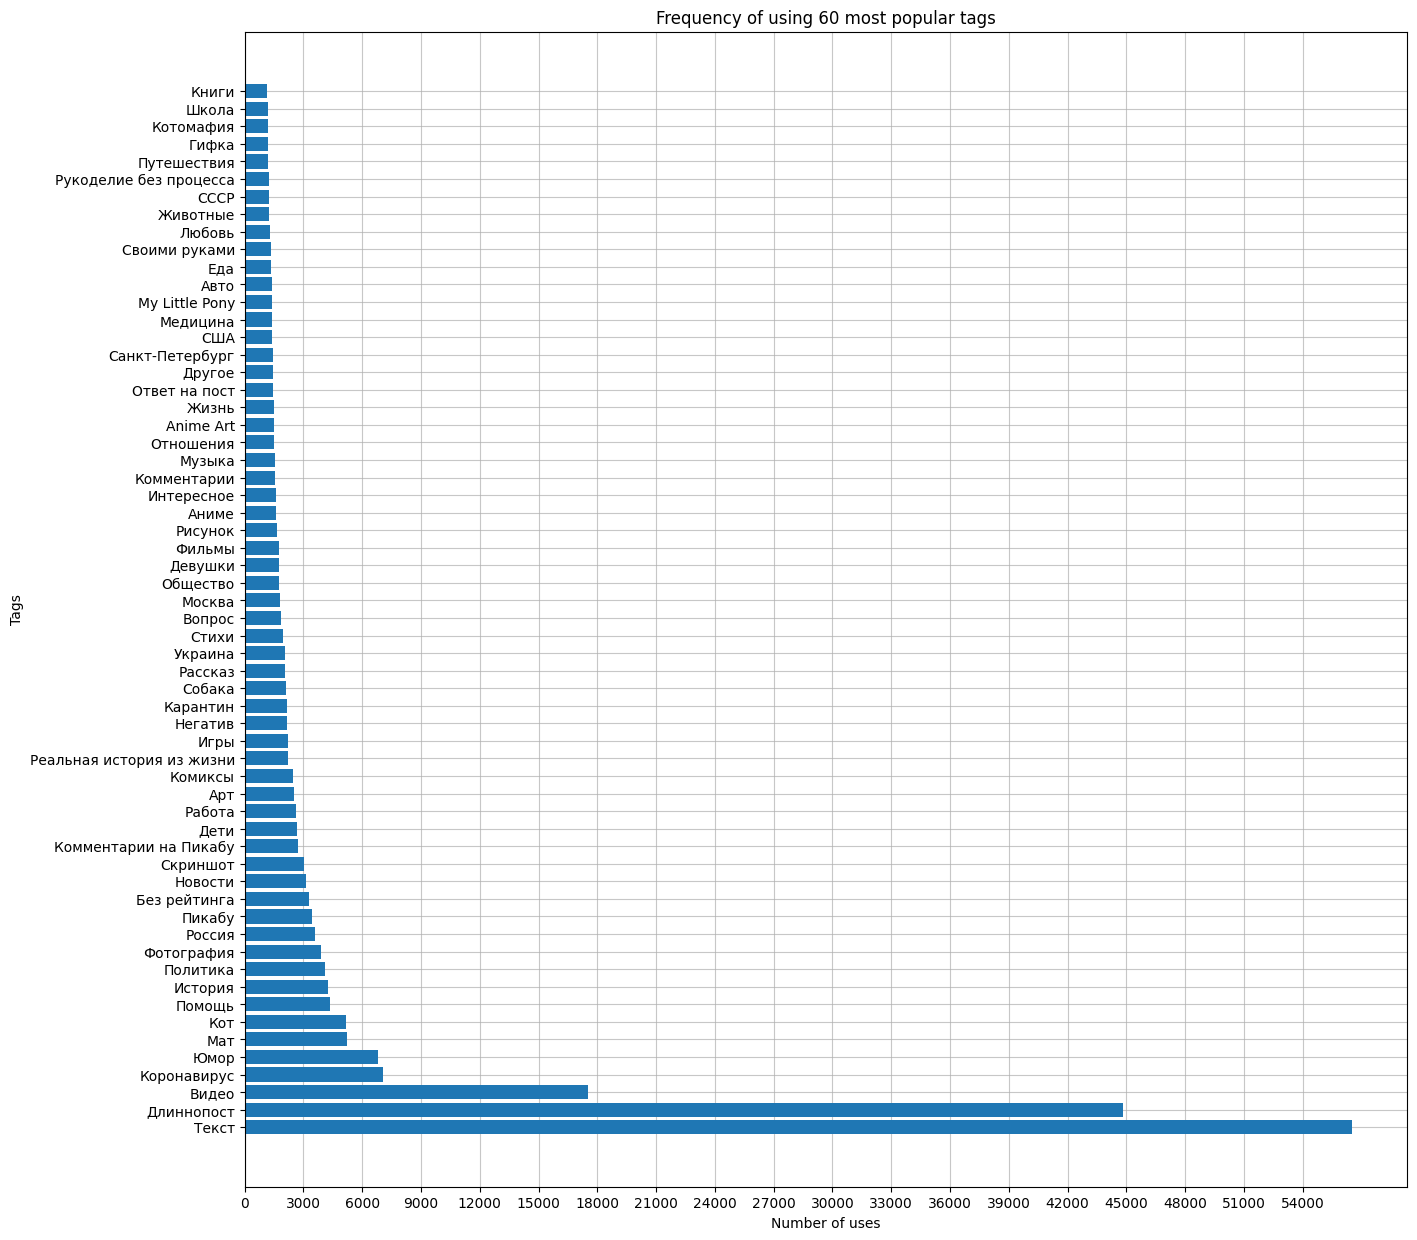

In [15]:
word = list(et_tg_cnt_cond.keys())
count = list(et_tg_cnt_cond.values())

N_MOST_POPULAR = 60 # Set the value based on how many top tags you want to receive

assert N_MOST_POPULAR <= len(count) and N_MOST_POPULAR > 0, f"N_MOST_POPULAR value must be in range [1, {len(count)}]."

fig, ax = plt.subplots(figsize=(15,15))

ax.grid(zorder=1, alpha=0.7)
ax.barh(word[0:N_MOST_POPULAR], count[0:N_MOST_POPULAR], zorder=2)
ax.set_xticks(np.arange(0, max(count), 3000))
ax.set_xlabel("Number of uses")
ax.set_ylabel("Tags")
ax.set_title(f"Frequency of using {N_MOST_POPULAR} most popular tags");

In [13]:
# Problematic tags:
bad_tags = ['Фотография', 'Видео', 'Скриншот', 'Anime Art', 'Гифка', 'Арт', 'Рисунок']
tags_to_remove = ['Длиннопост', 'Текст', 'Без рейтинга', 'Ответ на пост', 'Комментарии'] # not problematic, but tags, that are not in our interests?

# Top {N_MOST_POPULAR} tags
top_tags = word[0:N_MOST_POPULAR]

Save top `N_MOST_POPULAR` into file for future use:

In [14]:
txt_path = module_path + '/data/'
with open(txt_path + 'top_tags.txt', 'w') as f:
    for line in top_tags:
        f.write(line)
        f.write('\n')